# Model Building and Saving
Now the models will be trained on the entire dataset and will be saved so that they can be loaded easily for deployment.

## Importing the libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pickle import dump
from pickle import load

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('bankruptcy-prevention_encoded.csv', index_col=0)
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class,Class Code
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [3]:
x = data.iloc[:, :-2]
y = data[['Class Code']]

## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [5]:
y_pred = model.predict(x)

log_acc= accuracy_score(y, y_pred)

log_f1 = f1_score(y, y_pred)

log_prec = precision_score(y, y_pred)

log_roc = roc_auc_score(y, y_pred)

In [6]:
dump(model,open('Logistic_Regression_model.sav', 'wb'))

## Decision Tree Model
This model works on the construction of trees that contains different branches at different splits. And these branches contains leaves or nodes which are the end points. A split occurs at a node based on a certain condition which the model will make based on the data.

This model is normally used for classification purposes. But it can also be used for regression.

In [7]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5)
dec.fit(x, y)

DecisionTreeClassifier(max_depth=5)

In [8]:
y_pred = dec.predict(x)

dec_acc= accuracy_score(y, y_pred)

dec_f1 = f1_score(y, y_pred)

dec_prec = precision_score(y, y_pred)

dec_roc = roc_auc_score(y, y_pred)

In [9]:
dump(dec,open('Decision_Tree.sav', 'wb'))

## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn.predict(x)

knn_acc= accuracy_score(y, y_pred)

knn_f1 = f1_score(y, y_pred)

knn_prec = precision_score(y, y_pred)

knn_roc = roc_auc_score(y, y_pred)

In [12]:
dump(knn,open('KNN.sav', 'wb'))

## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(max_depth=5)
rnd.fit(x, y)

C:\Users\harivars\AppData\Local\Temp\ipykernel_20340\2309126800.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd.fit(x, y)


RandomForestClassifier(max_depth=5)

In [14]:
y_pred = rnd.predict(x)

rnd_acc= accuracy_score(y, y_pred)

rnd_f1 = f1_score(y, y_pred)

rnd_prec = precision_score(y, y_pred)

rnd_roc = roc_auc_score(y, y_pred)

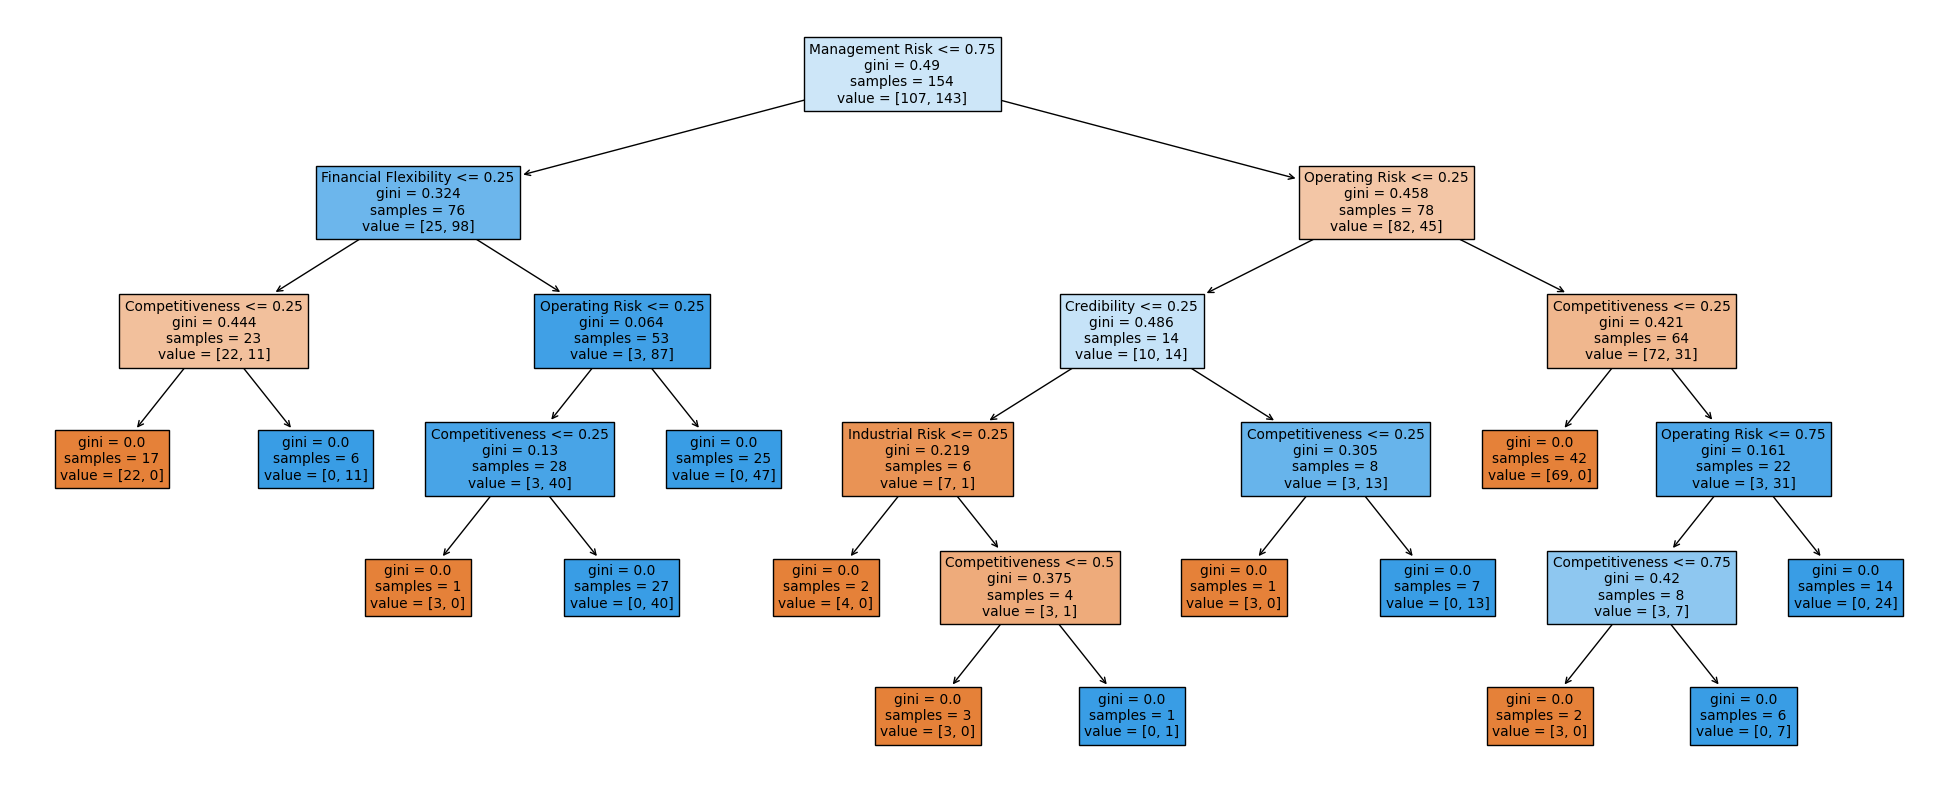

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(rnd.estimators_[9], feature_names= list(x),filled=True, max_depth=5)

In [16]:
dump(rnd,open('Random_Forest.sav', 'wb'))

## Bagging Classifier

In [17]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [18]:
y_pred = bag.predict(x)

bag_acc= accuracy_score(y, y_pred)

bag_f1 = f1_score(y, y_pred)

bag_prec = precision_score(y, y_pred)

bag_roc = roc_auc_score(y, y_pred)

In [19]:
dump(bag,open('Bagging.sav', 'wb'))

## AdaBoost
This is another ensemble technique that assigns the weights to the parameters depending the errors. Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration. This will help it reach the convergence much faster.

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [21]:
y_pred = ada.predict(x)

ada_acc= accuracy_score(y, y_pred)

ada_f1 = f1_score(y, y_pred)

ada_prec = precision_score(y, y_pred)

ada_roc = roc_auc_score(y, y_pred)

In [22]:
dump(ada,open('AdaBoost.sav', 'wb'))

## Gradient Boosting Classifier
This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(learning_rate=0.01)
grad.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01)

In [24]:
y_pred = grad.predict(x)

grad_acc= accuracy_score(y, y_pred)

grad_f1 = f1_score(y, y_pred)

grad_prec = precision_score(y, y_pred)

grad_roc = roc_auc_score(y, y_pred)

In [25]:
dump(grad,open('Gradient_Boost.sav', 'wb'))

## SVR
This model uses the support vector concept. There are 3 kernels which are linear, polynomial, and rbf.

### Linear Kernel

In [26]:
from sklearn.svm import SVC

svcl = SVC(kernel= "linear") 
svcl.fit(x, y) 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [27]:
y_pred = svcl.predict(x)

svcl_acc= accuracy_score(y, y_pred)

svcl_f1 = f1_score(y, y_pred)

svcl_prec = precision_score(y, y_pred)

svcl_roc = roc_auc_score(y, y_pred)

In [54]:
dump(svcl,open('SVC_Linear.sav', 'wb'))

### Polynomial Kernel

In [29]:
svcp = SVC(kernel= "poly") 
svcp.fit(x, y) 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [30]:
y_pred = svcp.predict(x)

svcp_acc= accuracy_score(y, y_pred)

svcp_f1 = f1_score(y, y_pred)

svcp_prec = precision_score(y, y_pred)

svcp_roc = roc_auc_score(y, y_pred)

In [47]:
dump(svcp,open('SVC_Poly.sav', 'wb'))

### RBF Kernel

In [32]:
svcr = SVC(C= 20, gamma = 50) 
svcr.fit(x, y) 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=20, gamma=50)

In [33]:
y_pred = svcr.predict(x)

svcr_acc= accuracy_score(y, y_pred)

svcr_f1 = f1_score(y, y_pred)

svcr_prec = precision_score(y, y_pred)

svcr_roc = roc_auc_score(y, y_pred)

In [52]:
dump(svcr,open('SVC_RBF.sav', 'wb'))

## Stacking
In this technique different types of estimators or even ensembles can be used stacked upon each other to get the results.

Here the logistic regressor, decision tree classifier, and the gradient boosting classifier are stacked together.

In [35]:
from sklearn.ensemble import StackingClassifier

estimators = [('log', LogisticRegression(max_iter=500)), ('rnd', RandomForestClassifier(max_depth=5)), ('svcr', SVC(C= 20, gamma = 50))]
stack = StackingClassifier(estimators=estimators)
stack.fit(x, y)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('log', LogisticRegression(max_iter=500)),
                               ('rnd', RandomForestClassifier(max_depth=5)),
                               ('svcr', SVC(C=20, gamma=50))])

In [36]:
y_pred = stack.predict(x)

stack_acc= accuracy_score(y, y_pred)

stack_f1 = f1_score(y, y_pred)

stack_prec = precision_score(y, y_pred)

stack_roc = roc_auc_score(y, y_pred)

In [37]:
dump(stack,open('Stacking.sav', 'wb'))

## Artificial Neural Networks

In [42]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 6,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

ann = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

ann.fit(x, y)

y_pred = ann.predict(x)

ann_acc= accuracy_score(y, y_pred)

ann_f1 = f1_score(y, y_pred)

ann_prec = precision_score(y, y_pred)

ann_roc = roc_auc_score(y, y_pred)

C:\Users\harivars\AppData\Local\Temp\ipykernel_20340\616758777.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)
D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step


In [43]:
ann.model.save('ANN.h5')

In [44]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC Linear Kernel', 'SVC Polynomial Kernel', 'SVC RBF Kernel', 'Stacking', 'Neural Networks'],
    'Accuracy': [log_acc, dec_acc, knn_acc, rnd_acc, bag_acc, ada_acc, grad_acc, svcl_acc, svcp_acc, svcr_acc, stack_acc, ann_acc],
    'F1 Score': [log_f1, dec_f1, knn_f1, rnd_f1, bag_f1, ada_f1, grad_f1, svcl_f1, svcp_f1, svcr_f1, stack_f1, ann_f1],
    'Precision': [log_prec, dec_prec, knn_prec, rnd_prec, bag_prec, ada_prec, grad_prec, svcl_prec, svcp_prec, svcr_prec, stack_prec, ann_prec],
    'ROC-AUC Score': [log_roc, dec_roc, knn_roc, rnd_roc, bag_roc, ada_roc, grad_roc, svcl_roc, svcp_roc, svcr_roc, stack_roc, ann_roc]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Accuracy,F1 Score,Precision,ROC-AUC Score
0,Logistic Regression,0.996,0.996516,0.993056,0.995327
1,Decision Tree,1.000,1.000000,1.000000,1.000000
2,KNN,1.000,1.000000,1.000000,1.000000
3,Random Forest,1.000,1.000000,1.000000,1.000000
4,Bagging,1.000,1.000000,1.000000,1.000000
5,AdaBoost,1.000,1.000000,1.000000,1.000000
6,Gradient Boost,1.000,1.000000,1.000000,1.000000
7,SVC Linear Kernel,0.996,0.996516,0.993056,0.995327
8,SVC Polynomial Kernel,1.000,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000,1.000000,1.000000,1.000000


In [45]:
results_df.sort_values(by=['F1 Score'], ascending=False)

,Model Name,Accuracy,F1 Score,Precision,ROC-AUC Score
1,Decision Tree,1.000,1.000000,1.000000,1.000000
2,KNN,1.000,1.000000,1.000000,1.000000
3,Random Forest,1.000,1.000000,1.000000,1.000000
4,Bagging,1.000,1.000000,1.000000,1.000000
5,AdaBoost,1.000,1.000000,1.000000,1.000000
6,Gradient Boost,1.000,1.000000,1.000000,1.000000
8,SVC Polynomial Kernel,1.000,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000,1.000000,1.000000,1.000000
10,Stacking,1.000,1.000000,1.000000,1.000000
11,Neural Networks,1.000,1.000000,1.000000,1.000000


--------------------------

From the results table it is clear that the **Decision Tree, KNN, Random Forest, Bagging, AdaBoost, Gradient Boost, SVC Polynomial Kernel, SVC RBF Kernel, Stacking and the Neural Network classifiers** has the highest F1 Score of 100%.